# 匯入套件

In [ ]:
pip install mpl_finance

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2021-05-10 14:33:53--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-05-10 14:33:53--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-05-10 14:33:53--  https://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newcon

In [ ]:
import datetime
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns
import talib
import time

# 目標資訊

In [ ]:
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,3,30)
stocklist = ['1101.TW','1102.TW','1103.TW','1104.TW','1108.TW','1109.TW','1110.TW']

In [ ]:
def info(target):
    df_stock = web.DataReader(target,'yahoo',start,end)
    df_stock.index = df_stock.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 
    return df_stock
def startlowNhigh(stockname,df):
    lowdate = df["Low"][stockname].idxmin()
    lowprice = min(df["Low"][stockname])
    highdate = df["High"][stockname].loc[df["Low"][stockname].idxmin():].idxmax()
    highprice = max(df["High"][stockname].loc[df["Low"][stockname].idxmin():])
    roi = float((highprice-lowprice)/lowprice)
    output = list((stockname,lowdate,highdate,roi))
    return output
def endlowNhigh(stockname,df):
    lowdate = df["Low"][stockname].loc[:df["Low"][stockname].idxmax()].idxmin()
    lowprice = min(df["Low"][stockname].loc[:df["Low"][stockname].idxmax()])
    highdate = df["High"][stockname].idxmax()
    highprice = max(df["High"][stockname])
    roi = float((highprice-lowprice)/lowprice)
    output = list((stockname,lowdate,highdate,roi))
    return output
def df():
    data=[['stock', 'start', 'end', 'roi']]
    temp = info(stocklist)
    for idx in stocklist:  
        data.append(startlowNhigh(idx,temp))
        data.append(endlowNhigh(idx,temp))
    new_df = pd.DataFrame(data[1:], columns=data[0])
    return new_df
def main():
    data = df()
    for final in range(len(data)):
        if  data.iloc[final]['roi']==max(data['roi']):
            return data.iloc[final]
def visualize(stock):
    print(stock)
    onlystock = stock.stock
    target = info(onlystock)
    fig = plt.figure(figsize=(24, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(range(0, len(target.index), 10))
    ax.set_xticklabels(target.index[::10])
    mpf.candlestick2_ochl(ax, target['Open'], target['Close'], target['High'],target['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
    sma_10 = talib.SMA(np.array(target['Close']), 10)
    sma_30 = talib.SMA(np.array(target['Close']), 30)
    # plt.xticks(rotation=90)
    plt.rcParams['font.sans-serif']=['DejaVu Sans']
    ax.plot(sma_10, label='10MA')
    ax.plot(sma_30, label='30MA')
    plt.title(onlystock)
    ax.legend()

# 執行程式

stock       1109.TW
start    2021-01-22
end      2021-03-31
roi        0.322222
Name: 10, dtype: object


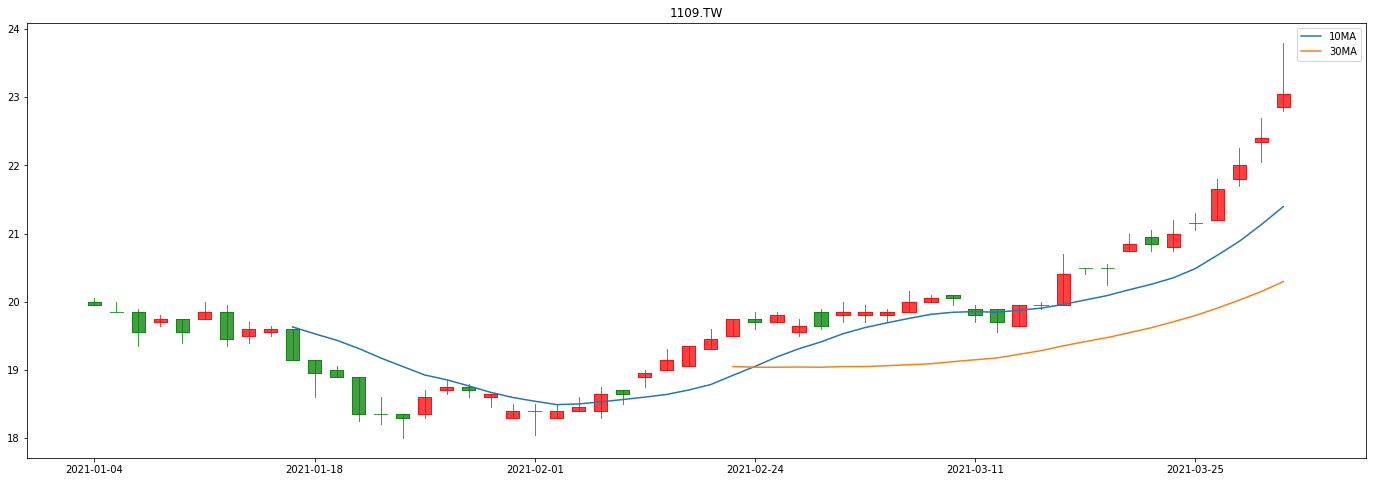

In [ ]:
visualize(main())

# Data Visualization

In [ ]:
#折線圖
def plotpic(df,stock):
  fig = plt.figure(figsize=(12, 6))
  ax = fig.add_subplot(1, 1, 1)
  x = df.index
  ax.set_xticks(range(0, len(x), 10))
  y1 = df['Open'][stock]
  y2 = df['Close'][stock]
  plt.xlabel('Date')
  plt.ylabel('Close Price')
  plt.title(stock+str(' plot'))
  plt.rcParams["figure.figsize"] = (13, 5)
  plt.plot(x,y1,label='Open')
  plt.plot(x,y2,label='Close')
  plt.legend(loc='upper left')
  plt.show()

In [ ]:
#柱狀圖
def barpic(df,stock):
  fig = plt.figure(figsize=(12, 6))
  ax = fig.add_subplot(1, 1, 1)
  x = df.index
  ax.set_xticks(range(0, len(x), 10))  
  y = df['Volume'][stock]
  plt.bar(x,y,facecolor='SkyBlue')
  plt.grid(True)
  plt.xlabel('Date')
  plt.ylabel('Volume')
  plt.title(stock+str(' bar'))

In [ ]:
#散點圖
def scatterpic(df,stock):
  x = df['Close'][stock]
  y = df['Volume'][stock]
  plt.title(stock+str(' scatter'))
  plt.xlabel('Close Price')
  plt.ylabel('Volume')
  plt.scatter(x,y)

In [ ]:
#增加子圖
def add_subpic(df,stock):
  x = df.index
  y1 = df['Open'][stock]
  y2 = df['Close'][stock]
  fig=plt.figure()
  ax1=fig.add_subplot(2,1,1)
  ax1.plot(x, y1)
  ax1.set_xticks(range(0, len(x), 10)) 
  ax2=fig.add_subplot(2,1,2)
  ax2.plot(x, y2)
  ax2.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
  ax2.set_xticks(range(0, len(x), 10))

  ax1.set_title(stock+' Price')
  ax2.set_title(stock+' Close Price')
  fig.tight_layout()

In [ ]:
#共享y軸折線圖
def doubleypic(df,stock):
  x = df.index
  y1 = df['Close'][stock]
  y2 = df['Volume'][stock]
  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  ax1.plot(x, y1,'r',label="Close Price")
  ax1.legend(loc=1)
  ax1.set_xlabel('Date')
  ax1.set_ylabel('Y values for Close Price')
  ax1.set_xticks(range(0, len(x), 10)) 
  ax2 = ax1.twinx() 
  ax2.plot(x, y2, 'g',label = "Volume")
  ax2.legend(loc=2)
  ax2.set_ylabel('Y values for Volume')
  ax2.set_xticks(range(0, len(x), 10)) 
  fig.suptitle(stock+' Close Price and Volume', fontsize=16)
  plt.grid(True)

In [ ]:
#核密度圖
def kdepic1(df,stock):
  sns.set()
  sns.kdeplot(df['Volume'][stock],color="g",shade=True).set_title(stock+' KDE of Volume',fontsize = 12) 

In [ ]:
#核密度圖
def kdepic2(df,stock):
  plt.figure(figsize=(6,6),dpi=100)
  plt.subplot(2, 1, 1)
  sns.kdeplot(df['Close'][stock], df['Volume'][stock],color='r',shade=True,cbar=True).set_title('KDE of Close Price and Volume ',fontsize = 12)
  plt.subplot(2, 2, 3)
  sns.kdeplot(df['Open'][stock], df['Volume'][stock],color='r')
  plt.title("Volume", fontsize = 10)
  plt.subplot(2, 2, 4)
  sns.kdeplot(df['Close'][stock], df['Volume'][stock],color = 'r')
  plt.title("Close Price",fontsize = 10)
  plt.tight_layout()

In [ ]:
df = info(stocklist)
idx='1101.TW'

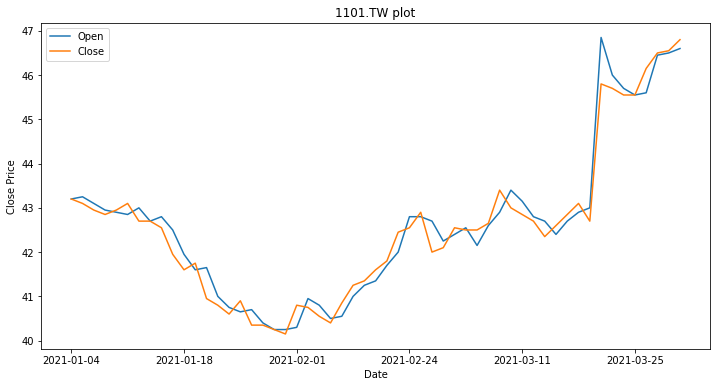

In [ ]:
plotpic(df,idx)

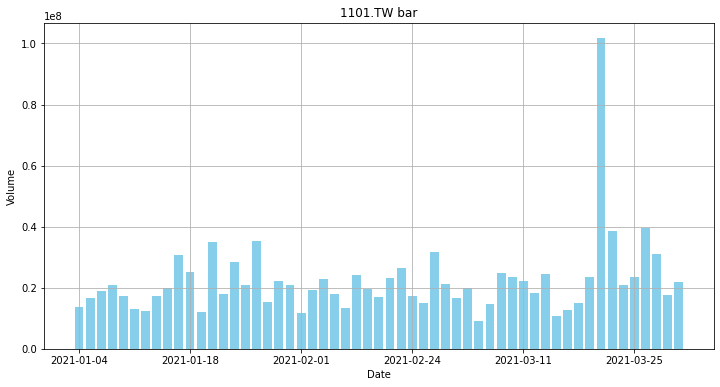

In [ ]:
barpic(df,idx)

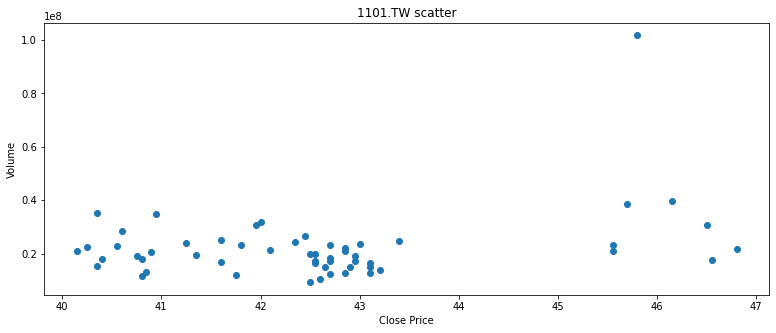

In [ ]:
scatterpic(df,idx)

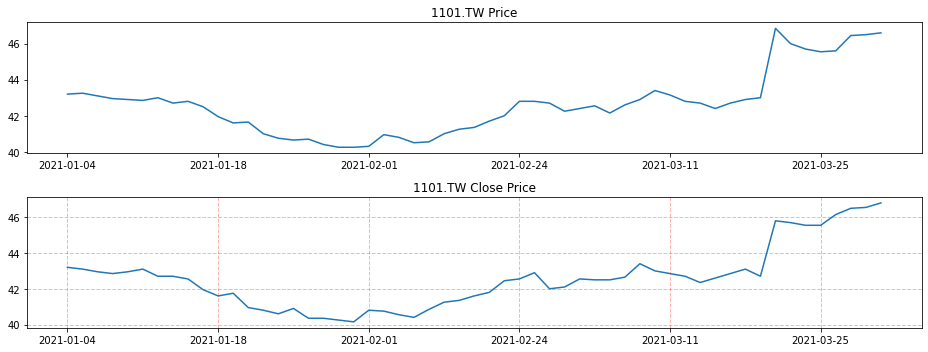

In [ ]:
add_subpic(df,idx)

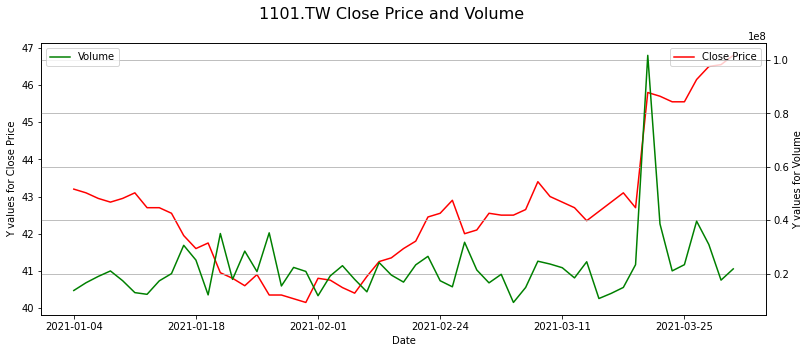

In [ ]:
doubleypic(df,idx)

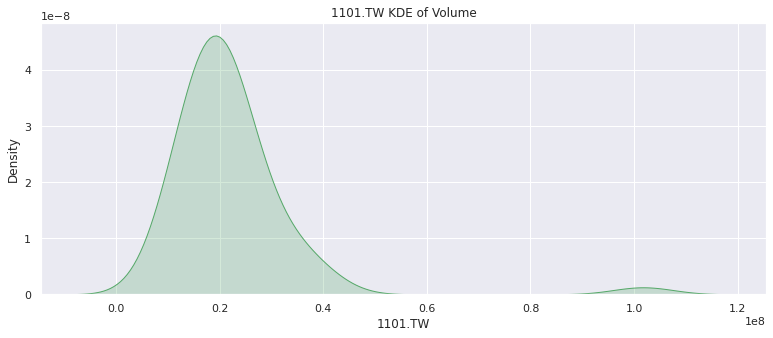

In [ ]:
kdepic1(df,idx)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


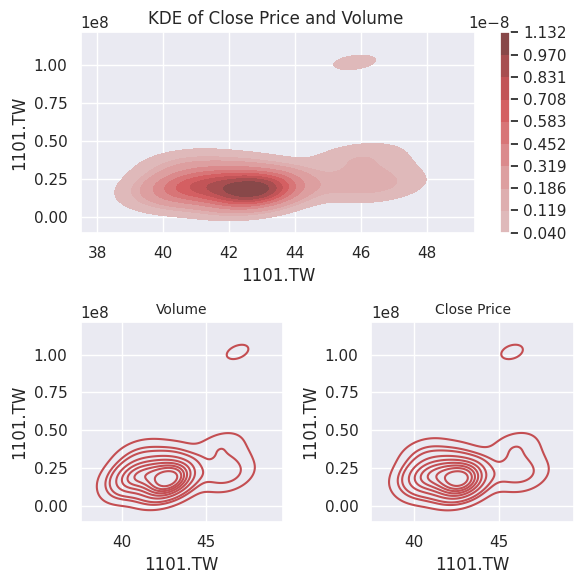

In [ ]:
kdepic2(df,idx)